In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 


In [ ]:
clinical_text_df = pd.read_csv('mtsamples.csv')

print(clinical_text_df.columns)
clinical_text_df.head(5)

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
clinical_text_df = clinical_text_df[clinical_text_df['transcription'].notna()]

In [ ]:
##returns no. of words and sentences in the context

def get_sentence_word_count(text_list):
    sent_count = 0
    word_count = 0
    vocab = {}
    for text in text_list:
        sentences=sent_tokenize(str(text).lower())
        sent_count = sent_count + len(sentences)
        for sentence in sentences:
            words=word_tokenize(sentence)
            for word in words:
                if(word in vocab.keys()):
                    vocab[word] = vocab[word] +1
                else:
                    vocab[word] =1 
    word_count = len(vocab.keys())
    return sent_count,word_count

In [ ]:
data_categories  = clinical_text_df.groupby(clinical_text_df['medical_specialty'])
i = 1
print('Categories :')
for catName,dataCategory in data_categories:
    print(str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1

Categories :
1  Allergy / Immunology : 7
2  Autopsy : 8
3  Bariatrics : 18
4  Cardiovascular / Pulmonary : 371
5  Chiropractic : 14
6  Consult - History and Phy. : 516
7  Cosmetic / Plastic Surgery : 27
8  Dentistry : 27
9  Dermatology : 29
10  Diets and Nutritions : 10
11  Discharge Summary : 108
12  ENT - Otolaryngology : 96
13  Emergency Room Reports : 75
14  Endocrinology : 19
15  Gastroenterology : 224
16  General Medicine : 259
17  Hematology - Oncology : 90
18  Hospice - Palliative Care : 6
19  IME-QME-Work Comp etc. : 16
20  Lab Medicine - Pathology : 8
21  Letters : 23
22  Nephrology : 81
23  Neurology : 223
24  Neurosurgery : 94
25  Obstetrics / Gynecology : 155
26  Office Notes : 50
27  Ophthalmology : 83
28  Orthopedic : 355
29  Pain Management : 61
30  Pediatrics - Neonatal : 70
31  Physical Medicine - Rehab : 21
32  Podiatry : 47
33  Psychiatry / Psychology : 53
34  Radiology : 273
35  Rheumatology : 10
36  SOAP / Chart / Progress Notes : 166
37  Sleep Medicine : 20
38  S

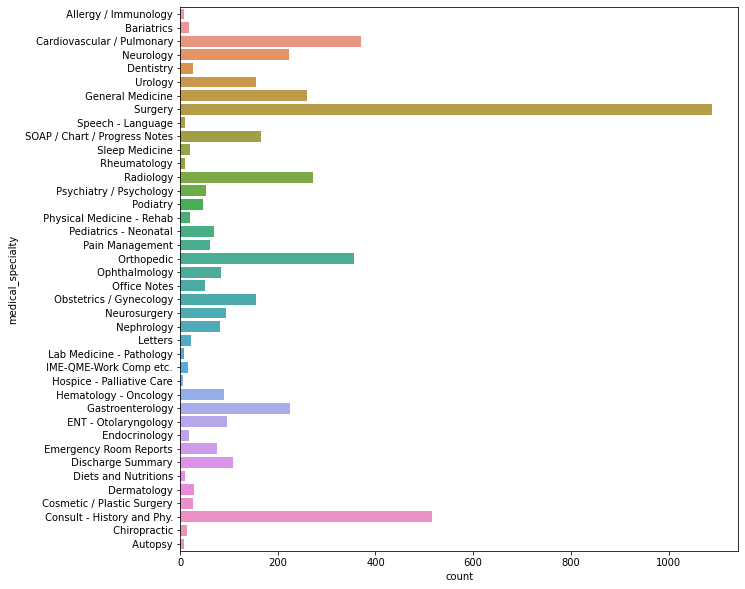

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y='medical_specialty', data = clinical_text_df )
plt.show()

In [ ]:
filtered_data_categories = data_categories.filter(lambda x:x.shape[0] > 50 and x.shape[0] <200)
final_data_categories = filtered_data_categories.groupby(filtered_data_categories['medical_specialty'])
i=1
print('Reduced Categories:')
for catName,dataCategory in final_data_categories:
    print(str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1


Reduced Categories:
1  Discharge Summary : 108
2  ENT - Otolaryngology : 96
3  Emergency Room Reports : 75
4  Hematology - Oncology : 90
5  Nephrology : 81
6  Neurosurgery : 94
7  Obstetrics / Gynecology : 155
8  Ophthalmology : 83
9  Pain Management : 61
10  Pediatrics - Neonatal : 70
11  Psychiatry / Psychology : 53
12  SOAP / Chart / Progress Notes : 166
13  Urology : 156


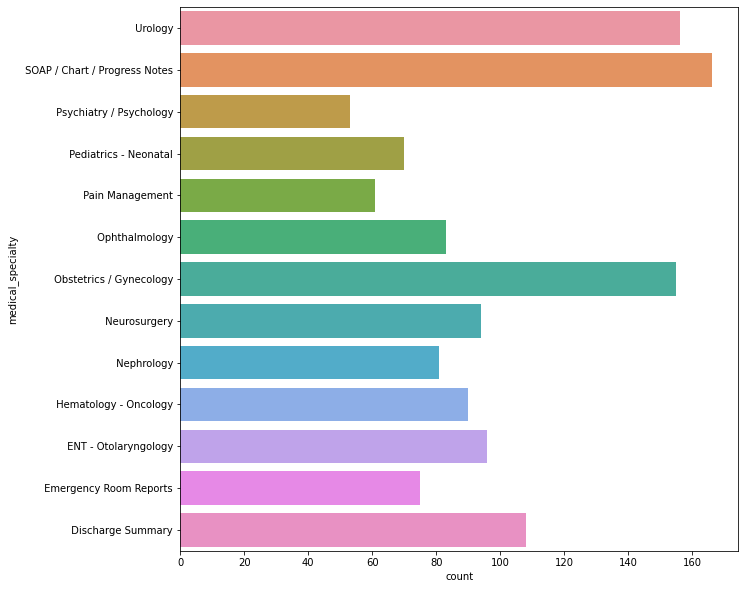

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y='medical_specialty', data = filtered_data_categories )
plt.show()

In [ ]:
print('Reduced Categories Transcription sample[1]:')
i=1
for catName,dataCategory in final_data_categories:
    print(str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    dataList = dataCategory['transcription'].tolist()
    print('Transcription:'+str(dataList[1]))
    print('--------------------------------------------')
    i = i+1


Reduced Categories Transcription sample[1]:
1  Discharge Summary : 108
Transcription:ADMISSION DIAGNOSES:,1.  Severe menometrorrhagia unresponsive to medical therapy.,2.  Severe anemia.,3.  Symptomatic fibroid uterus.,DISCHARGE DIAGNOSES:,1.  Severe menometrorrhagia unresponsive to medical therapy.,2.  Severe anemia.,3.  Symptomatic fibroid uterus.,4.  Extensive adenomyosis by pathological report.,OPERATION PERFORMED: , On 6/10/2009 total abdominal hysterectomy (TAH).,COMPLICATIONS:,  None.,BLOOD TRANSFUSIONS: , None.,INFECTIONS: , None.,SIGNIFICANT LAB AND X-RAY: , On admission hemoglobin and hematocrit was 10.5 and 32.8 respectively.  On discharge, hemoglobin and hematocrit 7.9 and 25.2.,HOSPITAL COURSE AND TREATMENT:  ,The patient was admitted to the surgical suite and taken to the operating room on 6/10/2009 where a total abdominal hysterectomy (TAH) with low intraoperative complication was performed.  The patient tolerated all procedures well.  On the 1st postoperative day, the pa

In [ ]:
data = filtered_data_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data.shape

(1288, 2)

CLEANING TEXT

In [ ]:
##printing sample transcritpion

print('1: '+data.iloc[5]['medical_specialty']+"  "+data.iloc[5]['transcription']+'\n')
print('2: '+data.iloc[50]['medical_specialty']+"  "+data.iloc[50]['transcription']+'\n')
print('3: '+data.iloc[500]['medical_specialty']+"  "+data.iloc[500]['transcription']+'\n')


1:  Urology  DIAGNOSIS:,  Desires vasectomy.,NAME OF OPERATION: , Vasectomy.,ANESTHESIA:,  General.,HISTORY: , Patient, 37, desires a vasectomy.,PROCEDURE: , Through a midline scrotal incision, the right vas was identified and separated from the surrounding tissues, clamped, transected, and tied off with a 4-0 chromic.  No bleeding was identified.,Through the same incision the left side was identified, transected, tied off, and dropped back into the wound.  Again no bleeding was noted.,The wound was closed with 4-0 Vicryl times two.  He tolerated the procedure well.  A sterile dressing was applied.  He was awakened and transferred to the recovery room in stable condition.

2:  Urology  XYZ, M.D. ,Suite 123, ABC Avenue ,City, STATE 12345 ,RE:  XXXX, XXXX ,MR#:  0000000,Dear Dr. XYZ: ,XXXX was seen in followup in the Pediatric Urology Clinic.  I appreciate you speaking with me while he was in clinic.  He continues to have abdominal pain, and he had a diuretic renal scan, which indicates 

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
get_sentence_word_count(data.iloc[500]['transcription'])

(1104, 35)

In [ ]:
def clean_text(text ): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    #text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    #BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    text2 = text.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text2 = BAD_SYMBOLS_RE.sub('', text2)
    return text2

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))

    return ' '.join(wordlist)


def stop_word(text):
  stop_words = stopwords.words("english")
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  return text

In [ ]:
data['transcription'] = data['transcription'].apply(stop_word)
data['transcription'] = data['transcription'].apply(lemmatize_text)
data['transcription'] = data['transcription'].apply(clean_text)


In [ ]:
print('1: '+data.iloc[5]['medical_specialty']+"  "+data.iloc[5]['transcription']+'\n')
print('2: '+data.iloc[50]['medical_specialty']+"  "+data.iloc[50]['transcription']+'\n')
print('3: '+data.iloc[500]['medical_specialty']+"  "+data.iloc[500]['transcription']+'\n')


1:  Urology  diagnosis   desires vasectomy  name of operation   vasectomy  anesthesia   general  history   patient  37  desire vasectomy  procedure   through midline scrotal incision  right va identified separated surrounding tissue  clamped  transected  tied 40 chromic  no bleeding identified  through incision left side identified  transected  tied off  dropped back wound  again bleeding noted  the wound closed 40 vicryl time two  he tolerated procedure well  a sterile dressing applied  he awakened transferred recovery room stable condition 

2:  Urology  xyz  md   suite 123  abc avenue  city  state 12345  re  xxxx  xxxx  mr   0000000  dear dr xyz   xxxx seen followup pediatric urology clinic  i appreciate speaking clinic  he continues abdominal pain  diuretic renal scan  indicates evidence obstruction good differential function bilaterally   when i examined him  seems indicate pain essentially lower abdomen suprapubic region  however  actual physical examination  seems complain pain 

In [ ]:
get_sentence_word_count(data.iloc[500]['transcription'])

(850, 30)

In [ ]:

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,2), min_df= 0.05, max_df=0.80, use_idf=True, smooth_idf=True, max_features=500)
tfIdfMat  = vectorizer.fit_transform(data['transcription'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
print(feature_names)


['10', '100', '12', '15', '20', '25', '30', '40', '50', '60', 'abc', 'abdomen', 'abdomen soft', 'abdominal', 'able', 'abnormality', 'active', 'activity', 'acute', 'additional', 'adequate', 'admission', 'admitted', 'age', 'ago', 'air', 'alcohol', 'alert', 'allergies', 'anesthesia', 'anesthesia general', 'anesthetic', 'anterior', 'antibiotic', 'appeared', 'appears', 'applied', 'appropriate', 'approximately', 'area', 'arm', 'artery', 'aspect', 'assessment', 'attention', 'auscultation', 'benefit', 'better', 'bid', 'bilateral', 'bilaterally', 'biopsy', 'bladder', 'blade', 'bleeding', 'blood', 'blood loss', 'blood pressure', 'body', 'bone', 'bovie', 'bowel', 'breast', 'breath', 'brought', 'cancer', 'carcinoma', 'cardiac', 'cardiovascular', 'care', 'carried', 'case', 'catheter', 'cavity', 'cc', 'cell', 'cervical', 'cervix', 'change', 'chest', 'chest pain', 'chief', 'chief complaint', 'child', 'chronic', 'clamp', 'clear', 'clear auscultation', 'clinic', 'closed', 'closure', 'cm', 'complaint', 

In [ ]:
len(feature_names)

500

In [ ]:
vec = pd.DataFrame(tfIdfMat.todense(),columns=vectorizer.get_feature_names())

In [ ]:
vec.iloc[500]

10       0.0
100      0.0
12       0.0
15       0.0
20       0.0
        ... 
work     0.0
wound    0.0
xray     0.0
xyz      0.0
year     0.0
Name: 500, Length: 500, dtype: float64

In [ ]:
arr = vec.to_numpy()

In [ ]:
arr.shape

(1288, 500)

In [ ]:
  # import gc
  # gc.collect()
  # tfIdfMatrix = tfIdfMat.todense()
  # labels = data['medical_specialty'].tolist()
  # tsne_results = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(tfIdfMatrix)
  # plt.figure(figsize=(16,10))
  # palette = sns.hls_palette(21, l=.6, s=.9)
  # sns.scatterplot(
  #     x=tsne_results[:,0], y=tsne_results[:,1],
  #     hue=labels,
  #     palette= palette,
  #     legend="full",
  #     alpha=0.3
  # )
  # plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()

In [ ]:
category_list

array([' Urology', ' SOAP / Chart / Progress Notes',
       ' Psychiatry / Psychology', ' Pediatrics - Neonatal',
       ' Pain Management', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Hematology - Oncology',
       ' ENT - Otolaryngology', ' Emergency Room Reports',
       ' Discharge Summary'], dtype=object)

Training

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

In [ ]:
import gc
gc.collect()
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)

In [ ]:
print(X_train.shape,X_test.shape)

(966, 315) (322, 315)


In [ ]:
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_test_pred= clf.predict(X_test)

In [ ]:
labels = category_list
cm = confusion_matrix(y_test, y_test_pred, labels)

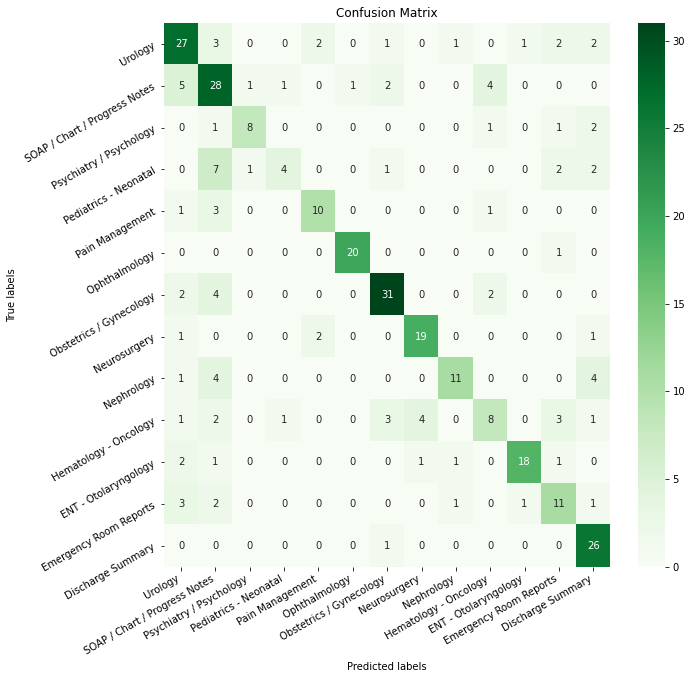

In [ ]:
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [ ]:
score = clf.score(X_test, y_test)
print( score)

0.6863354037267081


In [ ]:
classification_report(y_test, y_test_pred)

'                                precision    recall  f1-score   support\n\n             Discharge Summary       0.67      0.96      0.79        27\n          ENT - Otolaryngology       0.90      0.75      0.82        24\n        Emergency Room Reports       0.52      0.58      0.55        19\n         Hematology - Oncology       0.50      0.35      0.41        23\n                    Nephrology       0.79      0.55      0.65        20\n                  Neurosurgery       0.79      0.83      0.81        23\n       Obstetrics / Gynecology       0.79      0.79      0.79        39\n                 Ophthalmology       0.95      0.95      0.95        21\n               Pain Management       0.71      0.67      0.69        15\n         Pediatrics - Neonatal       0.67      0.24      0.35        17\n       Psychiatry / Psychology       0.80      0.62      0.70        13\n SOAP / Chart / Progress Notes       0.51      0.67      0.58        42\n                       Urology       0.63      0

In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
import pickle
# load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6863354037267081


In [ ]:
PRED=loaded_model.predict(X_test)

In [ ]:
##RESULT:
n=227
print("Actual Medical speciality: ",y_test[n])
print("Predicted Medical speciality: ",PRED[n])

Actual Medical speciality:   Pediatrics - Neonatal
Predicted Medical speciality:   SOAP / Chart / Progress Notes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from io import StringIO


StringData = StringIO("""transcription
    CHIEF COMPLAINT,:  This 32 year-old female presents today for an initial obstetrical examination.  Home pregnancy test was positive.,The patient indicates fetal activity is not yet detected (due to early stage of pregnancy).  LMP:  02/13/2002 EDD:  11/20/2002 GW:  8.0 weeks.  Patient has been trying to conceive for 6 months.,Menses:  Onset:  12 years old.  Interval:  24-26 days.  Duration:  4-6 days.  Flow:  moderate.  Complications:  PMS - mild.,Last Pap smear taken on 11/2/2001.  Contraception:  Patient is currently using none.,ALLERGIES:,  Patient admits allergies to venom - bee/wasp resulting in difficulty breathing, severe rash, pet dander resulting in nasal stuffiness.  Medication History:  None.,PAST MEDICAL HISTORY:,  Past medical history is unremarkable.  Past Surgical History:  Patient admits past surgical history of tonsillectomy in 1980.  Social History:  Patient admits alcohol use Drinking is described as social, Patient denies illegal drug use, Patient denies STD history, Patient denies tobacco use.,FAMILY HISTORY:,  Patient admits a family history of cancer of breast associated with mother.,REVIEW OF SYSTEMS:,Neurological: (+) unremarkable.,Respiratory: (+) difficulty sleeping, (-) breathing difficulties, respiratory symptoms.,Psychiatric: (+) anxious feelings.,Cardiovascular: (-) cardiovascular problems or chest symptoms.,Genitourinary: (-) decreased libido, (-) vaginal dryness, (-) vaginal bleeding.  Diet is high in empty calories, high in fats and low in fiber.,PHYSICAL EXAM:,  BP Standing:  126/84 Resp:  22 HR:  78 Temp:  99.1 Height:  5 ft.  6 in.  Weight:  132 lbs.,Pre-Gravid Weight is 125 lbs.,Patient is a 32 year old female who appears pleasant, in no apparent distress, her given age, well developed,,well nourished and with good attention to hygiene and body habitus.,Oriented to person, place and time.,Mood and affect normal and appropriate to situation.,HEENT:Head & Face:  Examination of head and face is unremarkable.,Skin:  No skin rash, subcutaneous nodules, lesions or ulcers observed.  No edema observed.,Cardiovascular:  Heart auscultation reveals no murmurs, gallop, rubs or clicks.,Respiratory:  Lungs CTA.,Breast:  Chest (Breasts):  Breast inspection and palpation shows no abnormal findings.,Abdomen:  Abdomen soft, nontender, bowel sounds present x 4 without palpable masses.,Genitourinary:  External genitalia are normal in appearance.  Examination of urethra shows no abnormalities.  Examination of vaginal vault reveals no abnormalities.  Cervix shows no pathology.  Uterine portion of bimanual exam reveals contour normal, shape regular and size normal.  Adnexa and parametria show no masses, tenderness, organomegaly or nodularity.  Examination of anus and perineum shows no abnormalities.,TEST RESULTS: , Urine pregnancy test:  positive. CBC results within normal limits.  Blood type:  O positive.  Rh:  positive.  FBS:  88 mg/dl.,IMPRESSION:,  Pregnancy, normal first.  Maternal nutrition is inadequate for protein and poor and high in empty calories and junk foods and sweets.,PLAN:,  Pap smear submitted for manual screening.  Ordered CBC.  Ordered blood type.  Ordered hemoglobin.  Ordered Rh.,Ordered fasting blood glucose.,COUNSELING:,  Counseling was given regarding adverse effects of alcohol, physical activity and sexual activity.  Educational supplies dispensed to patient.,Return to clinic in 4 week (s).,PRESCRIPTIONS:,  NatalCare Plus Dosage:  Prenatal Multivitamins tablet Sig:  QD Dispense:  60 Refills:  4 Allow Generic:  Yes,PATIENT INSTRUCTIONS:,  Patient received written information regarding pre-eclampsia and eclampsia.  Patient was instructed to restrict activity.  Patient instructed to limit caffeine use.  Patient instructed to limit salt intake.
    """)

df = pd.read_csv(StringData, sep =";")

print("Transcript",df.iloc[0]['transcription'])

def clean_text(text ): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    #text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    #BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    text2 = text.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text2 = BAD_SYMBOLS_RE.sub('', text2)
    return text2

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))

    return ' '.join(wordlist)


def stop_word(text):
  stop_words = stopwords.words("english")
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  return text

df['transcription'] = df['transcription'].apply(stop_word)
df['transcription'] = df['transcription'].apply(lemmatize_text)
df['transcription'] = df['transcription'].apply(clean_text)

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,2),  use_idf=True, smooth_idf=True, max_features=113)
tfIdfMat  = vectorizer.fit_transform(df['transcription'].tolist() )
#feature_names = sorted(vectorizer.get_feature_names())

#from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = CountVectorizer()
#tfIdfMat = vectorizer.fit_transform(df['transcription'].tolist())

# from sklearn.decomposition import PCA
# pca = PCA()
# tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())

# import gc
# gc.collect()
# pca = PCA(n_components=0.95)
# tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())

import pickle
# load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

PRED=loaded_model.predict(tfIdfMat)
print("Predicted class:", PRED)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Transcript     CHIEF COMPLAINT,:  This 32 year-old female presents today for an initial obstetrical examination.  Home pregnancy test was positive.,The patient indicates fetal activity is not yet detected (due to early stage of pregnancy).  LMP:  02/13/2002 EDD:  11/20/2002 GW:  8.0 weeks.  Patient has been trying to conceive for 6 months.,Menses:  Onset:  12 years old.  Interval:  24-26 days.  Duration:  4-6 days.  Flow:  moderate.  Complications:  PMS - mild.,Last Pap smear taken on 11/2/2001.  Contraception:  Patient is currently using none.,ALLERGIES:,  Patient admits allergies to venom - bee/wasp resulting in difficulty breathing, severe rash

In [ ]:
#labels = data['medical_specialty'].tolist()
#category_list = data.medical_specialty.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, Y,random_state=1)

In [ ]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test,random_state=1)

In [ ]:
X_train.shape

(966, 315)

In [ ]:
y_test.shape

(241, 13)

In [ ]:
X_test.shape

(241, 315)

In [ ]:
X_valid.shape

(81, 315)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.core import SpatialDropout1D
from keras.layers.embeddings import Embedding

In [ ]:
MAX_NB_WORDS = 5000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

In [ ]:
regressor = Sequential()
regressor.add(Embedding(MAX_NB_WORDS, 100, input_length=X_train.shape[1]))
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 20))

regressor.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# model = Sequential()
# model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=tfIdfMat.shape[1]))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(13, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# epochs = 5
# batch_size = 64

# history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)
#                     #callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [ ]:
X = X_train.toarray()

In [ ]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
264/264 [==============================] - 8s 29ms/step - loss: 7.9834 - accuracy: 0.0859
Epoch 2/10
264/264 [==============================] - 8s 29ms/step - loss: 7.9213 - accuracy: 0.0699
Epoch 3/10
264/264 [==============================] - 8s 29ms/step - loss: 8.0682 - accuracy: 0.0760
Epoch 4/10
264/264 [==============================] - 8s 29ms/step - loss: 8.0682 - accuracy: 0.0764
Epoch 5/10
264/264 [==============================] - 8s 29ms/step - loss: 8.1111 - accuracy: 0.0783
Epoch 6/10
264/264 [==============================] - 8s 29ms/step - loss: 8.0621 - accuracy: 0.0749
Epoch 7/10
264/264 [==============================] - 8s 29ms/step - loss: 8.0437 - accuracy: 0.0768
Epoch 8/10
264/264 [==============================] - 8s 29ms/step - loss: 7.9947 - accuracy: 0.0802
Epoch 9/10
264/264 [==============================] - 8s 29ms/step - loss: 7.8906 - accuracy: 0.0878
Epoch 10/10
264/264 [==============================] - 8s 29ms/step - loss: 7.9947 - accura

In [ ]:
accr = regressor.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
#accr[0]

21/21 [==============================] - 0s 19ms/step - loss: 7.9856 - accuracy: 0.0638
Test set
  Loss: 7.986
  Accuracy: 0.064


In [ ]:
accr

0.04629991948604584

In [ ]:
from sklearn.metrics import confusion_matrix
y_test_pred= regressor.predict(X_test)
category_list = data.medical_specialty.unique()
labels = category_list
cm = confusion_matrix(y_test, y_test_pred,labels)

ValueError: ignored

In [ ]:
# #gc.collect()
# pca = PCA(n_components=0.95)
# tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
# labels = data['medical_specialty'].tolist()
# category_list = data.medical_specialty.unique()
# X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [ ]:
!pip install tokenizer
import tokenizer

     |████████████████████████████████| 81kB 7.1MB/s 


In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['transcription'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 27997 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(data['transcription'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (3509, 250)


In [ ]:
Y = pd.get_dummies(data['medical_specialty']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (3509, 20)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3158, 250) (3158, 20)
(351, 250) (351, 20)


In [ ]:

# model = Sequential()
# model.add(Embedding(MAX_NB_WORDS, 100, input_length=X.shape[1]))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
# model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(20, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())
regressor = Sequential()
regressor.add(Embedding(MAX_NB_WORDS, 100, input_length=X_train.shape[1]))
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 20))

regressor.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
epochs = 50
batch_size = 64

history = regressor.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1) 
                        #callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/50
37/37 [==============================] - 9s 103ms/step - loss: 7.7482 - accuracy: 0.0808 - val_loss: 9.2801 - val_accuracy: 0.1174
Epoch 2/50
37/37 [==============================] - 2s 60ms/step - loss: 8.3568 - accuracy: 0.0540 - val_loss: 6.7285 - val_accuracy: 0.1174
Epoch 3/50
37/37 [==============================] - 2s 60ms/step - loss: 8.5067 - accuracy: 0.0612 - val_loss: 8.6910 - val_accuracy: 0.1174
Epoch 4/50
37/37 [==============================] - 2s 60ms/step - loss: 8.4243 - accuracy: 0.0486 - val_loss: 5.9832 - val_accuracy: 0.0189
Epoch 5/50
37/37 [==============================] - 2s 60ms/step - loss: 8.1572 - accuracy: 0.0424 - val_loss: 8.4864 - val_accuracy: 0.0189
Epoch 6/50
37/37 [==============================] - 2s 60ms/step - loss: 8.3797 - accuracy: 0.0504 - val_loss: 10.1349 - val_accuracy: 0.0189
Epoch 7/50
37/37 [==============================] - 2s 60ms/step - loss: 8.7294 - accuracy: 0.0509 - val_loss: 10.1506 - val_accuracy: 0.1174
Epoch 8/50

In [ ]:
accr = regressor.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

21/21 [==============================] - 1s 28ms/step - loss: 9.4553 - accuracy: 0.0243
Test set
  Loss: 9.455
  Accuracy: 0.024


In [ ]:
y_test_pred= regressor.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
category_list = data.medical_specialty.unique()
labels = category_list
cm = confusion_matrix(Y_test, y_test_pred,labels)

ValueError: ignored

In [ ]:
y_test_pred

array([[ 1.7481626, -2.3375366, -1.2327421, ...,  1.759252 , -1.5568787,
        -1.9060446],
       [ 1.7478287, -2.337226 , -1.2326381, ...,  1.7587464, -1.5570353,
        -1.9055557],
       [ 1.7478858, -2.3373256, -1.2326593, ...,  1.7587773, -1.5569516,
        -1.9056036],
       ...,
       [ 1.7480248, -2.3373876, -1.232707 , ...,  1.758926 , -1.556873 ,
        -1.905756 ],
       [ 1.7484607, -2.3376217, -1.2330002, ...,  1.7591311, -1.5565503,
        -1.9061439],
       [ 1.748035 , -2.3373375, -1.2327504, ...,  1.7588444, -1.5568148,
        -1.9057348]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 100, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(20, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 100)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
Total params: 5,082,420
Trainable params: 5,082,420
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 10
batch_size = 64

history = regressor.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/10
45/45 [==============================] - 32s 717ms/step - loss: 8.9670 - accuracy: 0.0545 - val_loss: 8.0590 - val_accuracy: 0.1203
Epoch 2/10
45/45 [==============================] - 32s 713ms/step - loss: 8.1221 - accuracy: 0.0693 - val_loss: 8.0590 - val_accuracy: 0.1203
Epoch 3/10
45/45 [==============================] - 32s 717ms/step - loss: 7.9136 - accuracy: 0.0619 - val_loss: 8.0590 - val_accuracy: 0.0443
Epoch 4/10
45/45 [==============================] - 32s 715ms/step - loss: 8.0132 - accuracy: 0.0686 - val_loss: 8.0590 - val_accuracy: 0.0443
Epoch 5/10
45/45 [==============================] - 32s 718ms/step - loss: 8.0757 - accuracy: 0.0721 - val_loss: 8.0590 - val_accuracy: 0.0443
Epoch 6/10
45/45 [==============================] - 32s 718ms/step - loss: 8.0388 - accuracy: 0.0647 - val_loss: 8.0590 - val_accuracy: 0.0443
Epoch 7/10
45/45 [==============================] - 32s 719ms/step - loss: 8.0586 - accuracy: 0.0598 - val_loss: 8.0590 - val_accuracy: 0.0443

In [ ]:
from sklearn.linear_model import LogisticRegression

ValueError: ignored

In [ ]:
import gc
gc.collect()
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)

In [ ]:
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_test_pred= clf.predict(X_test)

In [ ]:

labels = category_list
cm = confusion_matrix(y_test, y_test_pred, labels)

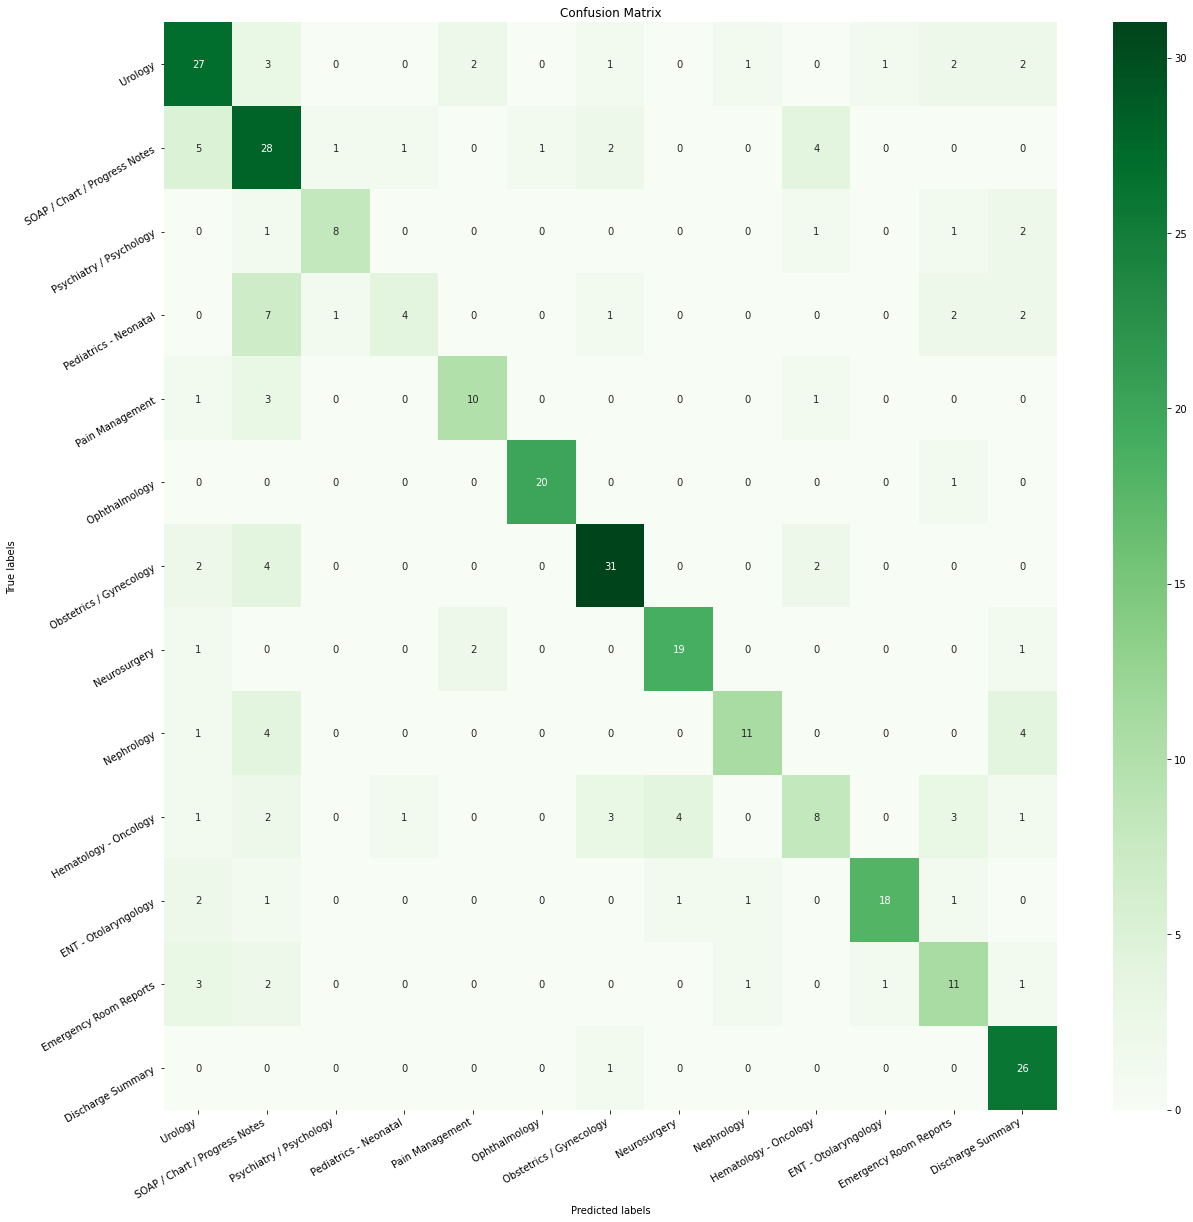

In [ ]:
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [ ]:
score = clf.score(X_test, y_test)
print( score)

0.6863354037267081


In [ ]:
classification_report(y_test, y_test_pred)

'                                precision    recall  f1-score   support\n\n             Discharge Summary       0.67      0.96      0.79        27\n          ENT - Otolaryngology       0.90      0.75      0.82        24\n        Emergency Room Reports       0.52      0.58      0.55        19\n         Hematology - Oncology       0.50      0.35      0.41        23\n                    Nephrology       0.79      0.55      0.65        20\n                  Neurosurgery       0.79      0.83      0.81        23\n       Obstetrics / Gynecology       0.79      0.79      0.79        39\n                 Ophthalmology       0.95      0.95      0.95        21\n               Pain Management       0.71      0.67      0.69        15\n         Pediatrics - Neonatal       0.67      0.24      0.35        17\n       Psychiatry / Psychology       0.80      0.62      0.70        13\n SOAP / Chart / Progress Notes       0.51      0.67      0.58        42\n                       Urology       0.63      0

In [ ]:
X_train.shape

(966, 315)

In [ ]:
X_test.shape

(322, 315)

In [ ]:
regressor = Sequential()
regressor.add(Embedding(MAX_NB_WORDS, 100, input_length=X_train.shape[1]))
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 13))

regressor.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [ ]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 10)

Epoch 1/50
97/97 [==============================] - 6s 28ms/step - loss: 8.0114 - accuracy: 0.0986
Epoch 2/50
97/97 [==============================] - 3s 27ms/step - loss: 8.3012 - accuracy: 0.0771
Epoch 3/50
97/97 [==============================] - 3s 27ms/step - loss: 8.2334 - accuracy: 0.0879
Epoch 4/50
97/97 [==============================] - 3s 27ms/step - loss: 7.5654 - accuracy: 0.0765
Epoch 5/50
97/97 [==============================] - 3s 29ms/step - loss: 8.9145 - accuracy: 0.0811
Epoch 6/50
97/97 [==============================] - 3s 29ms/step - loss: 7.9433 - accuracy: 0.0885
Epoch 7/50
97/97 [==============================] - 3s 29ms/step - loss: 8.4355 - accuracy: 0.0793
Epoch 8/50
97/97 [==============================] - 3s 29ms/step - loss: 8.2524 - accuracy: 0.0923
Epoch 9/50
97/97 [==============================] - 3s 28ms/step - loss: 7.9581 - accuracy: 0.0554
Epoch 10/50
97/97 [==============================] - 3s 29ms/step - loss: 8.4583 - accuracy: 0.0677
Epoch 11/

In [ ]:
X_train[100]

array([ 1.50632192e-01,  2.47474066e-02, -2.25083366e-02,  1.10709559e-01,
       -4.82914220e-02, -1.74124087e-02, -8.00030204e-02,  8.51674070e-02,
        1.60964025e-01, -1.75464645e-02, -1.15570415e-01,  2.07893203e-01,
        1.78018279e-01, -5.50708193e-02, -1.60008245e-01, -4.07185405e-02,
       -2.94706196e-02, -7.93152574e-02, -8.34387680e-02, -3.54347461e-02,
        5.99634110e-02, -3.61664616e-02,  5.31082376e-02, -1.71028508e-02,
        4.23860423e-02,  9.67169771e-02, -1.64271603e-02, -6.89175438e-02,
        2.22716147e-02,  9.79583141e-02,  4.10359882e-02,  1.50614384e-01,
       -2.51135870e-02, -2.41835542e-02,  2.26130237e-01,  2.98222928e-02,
        1.02360256e-01, -5.70375531e-02, -3.40975975e-02,  1.88016926e-01,
        1.62537084e-01,  3.82642611e-02, -4.30938295e-02, -9.99191324e-02,
       -2.75571125e-02, -1.14643739e-01,  1.13720350e-02,  2.00716669e-03,
       -4.17276218e-02,  4.60187913e-02,  1.09676847e-01,  1.36235749e-02,
       -7.99580948e-02, -

In [ ]:
y_train[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

SyntaxError: ignored

Normalize the data

In [ ]:
dataf=((tfIdfMat_reduced-tfIdfMat_reduced.min())/(tfIdfMat_reduced.max()-tfIdfMat_reduced.min()))

In [ ]:
dataf

array([[0.12629381, 0.3931784 , 0.43435352, ..., 0.44118454, 0.40988889,
        0.40469909],
       [0.41117292, 0.39141896, 0.43581319, ..., 0.36298682, 0.40917619,
        0.40832346],
       [0.11260529, 0.37010499, 0.43005888, ..., 0.36923973, 0.40206273,
        0.369016  ],
       ...,
       [0.62058005, 0.53030051, 0.70531682, ..., 0.3718179 , 0.4537711 ,
        0.38847691],
       [0.44101208, 0.46373289, 0.52612498, ..., 0.41556403, 0.40145683,
        0.40923983],
       [0.50470071, 0.41321205, 0.52692931, ..., 0.38860297, 0.43217053,
        0.36680733]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataf, Y,random_state=1)

In [ ]:
X_train

array([[0.77459529, 0.49158918, 0.46824448, ..., 0.46108275, 0.38705992,
        0.38597057],
       [0.24276837, 0.489586  , 0.52357733, ..., 0.41751251, 0.43179965,
        0.39994763],
       [0.67718208, 0.2764841 , 0.29923147, ..., 0.41507605, 0.42581109,
        0.3836391 ],
       ...,
       [0.1013605 , 0.40276546, 0.4094686 , ..., 0.41414355, 0.40914304,
        0.4031749 ],
       [0.76176319, 0.491826  , 0.46208878, ..., 0.37262483, 0.41354794,
        0.41043154],
       [0.61360599, 0.44209791, 0.53101779, ..., 0.41660906, 0.3904839 ,
        0.40710904]])

In [ ]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
regressor = Sequential()
regressor.add(Embedding(MAX_NB_WORDS, 100, input_length=X_train.shape[1]))
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 13))

regressor.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [ ]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 10)

Epoch 1/50
97/97 [==============================] - 6s 30ms/step - loss: 7.5418 - accuracy: 0.0994
Epoch 2/50
97/97 [==============================] - 3s 29ms/step - loss: 8.1214 - accuracy: 0.0720
Epoch 3/50
97/97 [==============================] - 3s 29ms/step - loss: 8.3287 - accuracy: 0.0626
Epoch 4/50
97/97 [==============================] - 3s 29ms/step - loss: 7.5956 - accuracy: 0.0747
Epoch 5/50
97/97 [==============================] - 3s 29ms/step - loss: 8.3478 - accuracy: 0.0867
Epoch 6/50
97/97 [==============================] - 3s 29ms/step - loss: 8.0044 - accuracy: 0.0713
Epoch 7/50
97/97 [==============================] - 3s 28ms/step - loss: 7.8871 - accuracy: 0.0892
Epoch 8/50
97/97 [==============================] - 3s 27ms/step - loss: 8.8180 - accuracy: 0.0732
Epoch 9/50
97/97 [==============================] - 3s 28ms/step - loss: 8.0954 - accuracy: 0.0812
Epoch 10/50
97/97 [==============================] - 3s 27ms/step - loss: 7.7599 - accuracy: 0.1090
Epoch 11/

In [ ]:
accr = regressor.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

11/11 [==============================] - 1s 21ms/step - loss: 8.8599 - accuracy: 0.0342
Test set
  Loss: 8.860
  Accuracy: 0.034


In [ ]:
import gc
gc.collect()

labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()

y_test_pred= regressor.predict(X_test)
labels = category_list
cm = confusion_matrix(y_test, y_test_pred, labels)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

ValueError: ignored

In [ ]:

labels

array([' Urology', ' SOAP / Chart / Progress Notes',
       ' Psychiatry / Psychology', ' Pediatrics - Neonatal',
       ' Pain Management', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Hematology - Oncology',
       ' ENT - Otolaryngology', ' Emergency Room Reports',
       ' Discharge Summary'], dtype=object)

In [ ]:
X_train

array([[15.49190574,  9.83178361,  9.36488962, ...,  9.22165495,
         7.74119847,  7.71941142],
       [ 4.85536736,  9.79172007, 10.47154657, ...,  8.35025014,
         8.63599293,  7.99895257],
       [13.54364165,  5.52968206,  5.98462945, ...,  8.30152104,
         8.51622184,  7.67278194],
       ...,
       [ 2.02721002,  8.05530914,  8.18937196, ...,  8.28287094,
         8.18286079,  8.06349808],
       [15.23526377,  9.83651994,  9.24177556, ...,  7.45249661,
         8.27095881,  8.20863073],
       [12.27211984,  8.84195811, 10.62035575, ...,  8.33218126,
         7.80967805,  8.14218086]])

In [ ]:
dataf

array([[1.64181957, 5.11131919, 5.6465957 , ..., 5.735399  , 5.32855554,
        5.26108817],
       [5.34524801, 5.08844642, 5.66557142, ..., 4.71882864, 5.3192905 ,
        5.30820492],
       [1.46386881, 4.81136492, 5.59076541, ..., 4.8001165 , 5.22681555,
        4.79720796],
       ...,
       [8.06754067, 6.89390667, 9.1691187 , ..., 4.83363274, 5.8990243 ,
        5.05019984],
       [5.73315705, 6.02852752, 6.8396247 , ..., 5.40233234, 5.2189388 ,
        5.32011777],
       [6.56110929, 5.37175661, 6.850081  , ..., 5.05183863, 5.61821688,
        4.76849525]])

In [ ]:
y_test_pred.argmax

<function ndarray.argmax>

In [ ]:
a = y_test_pred

array([-1.793158 , -1.3184744, -1.4377089,  1.2688776, -1.7868288,
        0.9149689,  1.2805475,  1.2327125, -1.1542467,  1.0500038,
        1.418888 , -1.3139422,  1.2899303], dtype=float32)

In [ ]:
y_test_pred= regressor.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
print(y_test_pred)

[[-1.793158  -1.3184744 -1.4377089 ...  1.418888  -1.3139422  1.2899303]
 [-1.793158  -1.3184744 -1.4377089 ...  1.418888  -1.3139422  1.2899303]
 [-1.793158  -1.3184744 -1.4377089 ...  1.418888  -1.3139422  1.2899303]
 ...
 [-1.793158  -1.3184744 -1.4377089 ...  1.418888  -1.3139422  1.2899303]
 [-1.7931582 -1.3184744 -1.4377087 ...  1.418888  -1.3139422  1.2899303]
 [-1.7931582 -1.3184744 -1.4377087 ...  1.418888  -1.3139422  1.2899303]]
